<a href="https://colab.research.google.com/github/Lukieskul/repository/blob/main/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slicing from multiindexed dfs and ploting


In [27]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/multi_index.csv'

In [28]:
import pandas as pd
import numpy as np

In [29]:
df=pd.read_csv(path, index_col=[0,1],
               header=[0,1])
df.head()

Night                                           Day  \
                       Weather       Wind Max Temperature            Weather   
City   Date                                                                    
London 01/07/19         Shower  SW 16 mph              18             Shower   
       02/07/19     Heavy rain  SW 16 mph              17             Shower   
       03/07/19     Heavy rain  SW 16 mph              19  Scattered showers   
       04/07/19  Mostly cloudy  SW 16 mph              23      Mostly cloudy   
Oxford 01/07/19         Shower  SW 16 mph              19             Shower   

                                            
                      Wind Max Temperature  
City   Date                                 
London 01/07/19  SW 16 mph              28  
       02/07/19  SW 16 mph              29  
       03/07/19  SW 16 mph              29  
       04/07/19  SW 16 mph              31  
Oxford 01/07/19  SW 13 mph              25

In [30]:
df.columns

MultiIndex([('Night',         'Weather'),
            ('Night',            'Wind'),
            ('Night', 'Max Temperature'),
            (  'Day',         'Weather'),
            (  'Day',            'Wind'),
            (  'Day', 'Max Temperature')],
           )

In [31]:
df.index

MultiIndex([(   'London', '01/07/19'),
            (   'London', '02/07/19'),
            (   'London', '03/07/19'),
            (   'London', '04/07/19'),
            (   'Oxford', '01/07/19'),
            (   'Oxford', '02/07/19'),
            (   'Oxford', '03/07/19'),
            (   'Oxford', '04/07/19'),
            ('Cambridge', '01/07/19'),
            ('Cambridge', '02/07/19'),
            ('Cambridge', '03/07/19'),
            ('Cambridge', '04/07/19')],
           names=['City', 'Date'])

In [32]:
df.iloc[5]

Night  Weather               Shower
       Wind               SW 16 mph
       Max Temperature           19
Day    Weather               Shower
       Wind               SW 16 mph
       Max Temperature           26
Name: (Oxford, 02/07/19), dtype: object

In [33]:

df.loc['London', (  'Day', 'Max Temperature')]

,Day
,Max Temperature
Date,
01/07/19,28
02/07/19,29
03/07/19,29
04/07/19,31


In [34]:
df.sort_index(axis=1,inplace=True)
df.head()

Day                                         Night  \
                Max Temperature            Weather       Wind Max Temperature   
City   Date                                                                     
London 01/07/19              28             Shower  SW 16 mph              18   
       02/07/19              29             Shower  SW 16 mph              17   
       03/07/19              29  Scattered showers  SW 16 mph              19   
       04/07/19              31      Mostly cloudy  SW 16 mph              23   
Oxford 01/07/19              25             Shower  SW 13 mph              19   

                                           
                       Weather       Wind  
City   Date                                
London 01/07/19         Shower  SW 16 mph  
       02/07/19     Heavy rain  SW 16 mph  
       03/07/19     Heavy rain  SW 16 mph  
       04/07/19  Mostly cloudy  SW 16 mph  
Oxford 01/07/19         Shower  SW 16 mph

In [35]:
df.sort_index(axis=0,inplace=True)
df.head()

Day                                \
                   Max Temperature            Weather       Wind   
City      Date                                                     
Cambridge 01/07/19              24             Shower  SW 16 mph   
          02/07/19              21  Scattered showers   E 20 mph   
          03/07/19              22  Scattered showers  SE 10 mph   
          04/07/19              22             Shower   S 25 mph   
London    01/07/19              28             Shower  SW 16 mph   

                             Night                                
                   Max Temperature            Weather       Wind  
City      Date                                                    
Cambridge 01/07/19              17             Shower  SW 16 mph  
          02/07/19              16  Scattered showers   E 20 mph  
          03/07/19              16  Scattered showers  SE 10 mph  
          04/07/19              16      Mostly cloudy   S 25 mph  
London    01/07/19              18             Shower  SW 16 mph

In [36]:
x=df.columns
x

MultiIndex([(  'Day', 'Max Temperature'),
            (  'Day',         'Weather'),
            (  'Day',            'Wind'),
            ('Night', 'Max Temperature'),
            ('Night',         'Weather'),
            ('Night',            'Wind')],
           )

In [37]:
type(x)

pandas.core.indexes.multi.MultiIndex

1.  What is the average of max temperature

2.   what is the max temperature during 03/07/19 irrespective of the city


3. what is the max temp  of day and night in cambridge and oxford


In [38]:
path

'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/multi_index.csv'

In [40]:
df.loc[:,( 'Day', 'Max Temperature')].mean().round(2)

25.83

In [41]:
df.iloc[:,0].mean().round(2)

25.83

In [44]:
df.loc[(slice(None), '03/07/2019'),(slice(None),'Max Temperature')]

KeyError: '03/07/2019'

In [45]:
favs = ['Cambridge', 'Oxford']
favs2 = ['Day', 'Night']


In [46]:
df.loc[(favs,(favs2,'Max Temperature'))]

Day           Night
                   Max Temperature Max Temperature
City      Date                                    
Cambridge 01/07/19              24              17
          02/07/19              21              16
          03/07/19              22              16
          04/07/19              22              16
Oxford    01/07/19              25              19
          02/07/19              26              19
          03/07/19              28              22
          04/07/19              25              21

1. cual es el comportamiento de max temperature durante los dias

In [47]:
day_max_temp = df.loc[:,( 'Day', 'Max Temperature')]
day_max_temp.head()

City       Date    
Cambridge  01/07/19    24
           02/07/19    21
           03/07/19    22
           04/07/19    22
London     01/07/19    28
Name: (Day, Max Temperature), dtype: int64

In [48]:
type(day_max_temp)

pandas.core.series.Series

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Max Temperature in days')

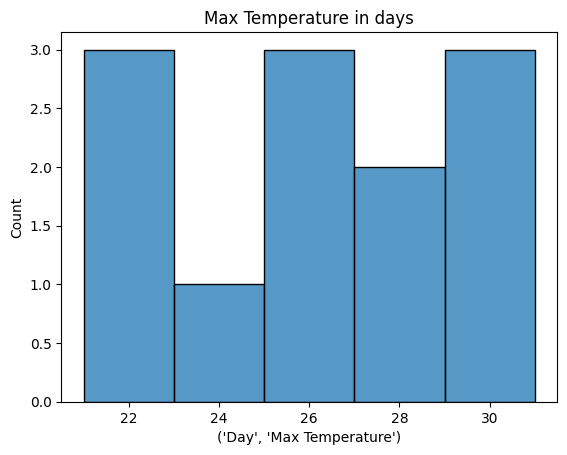

In [52]:
sns.histplot(day_max_temp).set_title('Max Temperature in days')